In [423]:
book_titles = {
		'English': {
				'shakespeare': (
						"A+Midsummer+Night's+Dream", 'Hamlet', 
						'Macbeth', 'Othello', 'Richard+III', 
						'Romeo+and+Juliet', 'The+Merchant+of+Venice'
						)
				},
		'French': {
				'chevalier': (
						"L'enfer+et+le+paradis+de+l'autre+monde",
						"L'i%CC%82le+de+sable", 'La+capitaine',
						'La+fille+des+indiens+rouges', 'La+fille+du+pirate',
						'Le+chasseur+noir', 'Les+derniers+Iroquois'
						)
				},
		'German': {
				'shakespeare': (
						'Der+Kaufmann+von+Venedig', 'Ein+Sommernachtstraum',
						'Hamlet', 'Macbeth', 'Othello', 'Richard+III',
						'Romeo+und+Julia'
						)
				},
		'Portuguese': {'shakespeare': ('Hamlet',)}
		}

######

import os 
import pandas as pd 
import numpy as np 
from collections import Counter


def count_words_fast(text): 
    text = text.lower() 
    skips = [".", ",", ";", ":", "'", '"', "\n", "!", "?", "(", ")"] 
    for ch in skips: 
        text = text.replace(ch, "") 
    word_counts = Counter(text.split(" ")) 
    return word_counts

def word_stats(word_counts): 
    num_unique = len(word_counts) 
    counts = word_counts.values() 
    return (num_unique, counts)

In [441]:
#Ex-1
"""
Define hamlets as a pandas dataframe with columns language and text.
Add an if statement to check if the title is equal to 'Hamlet'.
Store the results from read_book(inputfile) to text.
Consider: How many translations are there? Which languages are they 
translated into?
"""
import pandas as pd
import numpy as np

hamlets = pd.DataFrame(columns=("language", "text"))
# or hamlets=pd.DataFrame(columns=['language', 'text'])

data_filepath = '.'
book_dir = "\\Books"
title_num = 1

for language in book_titles:
    for author in book_titles[language]:
        for title in book_titles[language][author]:
            if title == "Hamlet":
                input_file = data_filepath+book_dir+"\\"+ language+"\\"+author+"\\"+title+".txt"

                text = read_book(input_file)
                
                hamlets.loc[title_num] = language, text
                title_num += 1

print(hamlets['language'])


1       English
2        German
3    Portuguese
Name: language, dtype: object


In [452]:
#Ex-2
"""
In this exercise, we will summarize the text for a single translation 
of Hamlet in a pandas dataframe. The language and text of the first 
translation of Hamlet in hamlets is given in the code section.
Find the dictionary of word frequency in text by calling count_words_fast(). 
Store this as counted_text. Create a pandas dataframe named data.
Using counted_text, define two columns in data: word, consisting of each 
unique word in text. count, consisting of the number of times each word 
in word is included in the text.
"""

language, text = hamlets.iloc[0]
counted_text = count_words_fast(text)
data = pd.DataFrame({
    "word": list(counted_text.keys()),
    "count": list(counted_text.values())
})

In [453]:
data[data.word=="hamlet"]

,word,count
4,hamlet,100


In [454]:
#Ex-3
"""
In this exercise, we will continue to define summary statistics for a 
single translation of Hamlet.
Add a column to data named length, defined as the length of each word.
Add another column named frequency, which is defined as follows for 
each word in data: If count > 10, frequency is frequent. 
If 1 < count <= 10, frequency is infrequent. 
If count == 1, frequency is unique.
"""

data["length"] = data['word'].apply(len)
def frequency(count):
    if count == 1:
        return "unique"
    elif count > 10:
         return "frequent"
    else:
         return "infrequent"
data["frequency"] = data['count'].apply(frequency)

In [455]:
data.groupby('frequency').count()

,word,count,length
frequency,,,
frequent,344,344,344
infrequent,1513,1513,1513
unique,2940,2940,2940


In [446]:
#Ex-4

#sub_data = pd.DataFrame({"language": language,
#1"frequency": ['frequent', 'infrequent', 'unique'],
#"mean_word_length": [],
# "num_words": []}) # doesn't work

sub_data = pd.DataFrame({
    "language": language,
    "frequency": ["frequent","infrequent","unique"],
    "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
    "num_words": data.groupby(by = "frequency")["count"].size()
})

In [447]:
sub_data

,language,frequency,mean_word_length,num_words
frequency,,,,
frequent,English,frequent,4.444767,344
infrequent,English,infrequent,5.933245,1513
unique,English,unique,6.988435,2940


In [462]:
#Exercise 5
"""
In this exercise, we will join all the data summaries for text Hamlet 
translation.
The previous code for summarizing a particular translation of Hamlet is 
consolidated into a single function called summarize_text. Create a pandas 
dataframe grouped_data consisting of the results of summarize_text for 
translation of Hamlet in hamlets. Use a for loop across the row indices 
of hamlets to assign each translation to a new row. Obtain the ith row of 
hamlets to variables using the .iloc method, and assign the output to 
variables language and text. Call summarize_text using language and text, 
and assign the output to sub_data. Use the pandas .append() function 
to append to pandas dataframes row-wise to grouped_data.
"""

def summarize_text(language, text):
    counted_text = count_words_fast(text)

    data = pd.DataFrame({
        "word": list(counted_text.keys()),
        "count": list(counted_text.values())
    })
    
    data.loc[data["count"] > 10,  "frequency"] = "frequent"
    data.loc[data["count"] <= 10, "frequency"] = "infrequent"
    data.loc[data["count"] == 1,  "frequency"] = "unique"
    
    data["length"] = data["word"].apply(len)
    
    sub_data = pd.DataFrame({
        "language": language,
        "frequency": ["frequent","infrequent","unique"],
        "mean_word_length": data.groupby(by = "frequency")["length"].mean(),
        "num_words": data.groupby(by = "frequency").size()
    })
    
    return(sub_data)

grouped_data = pd.DataFrame(columns = [
    "language", "frequency", "mean_word_length", "num_words"])

for i in range(hamlets.shape[0]):
    language, text = hamlets.iloc[i]
    sub_data = summarize_text(language, text)
    grouped_data = grouped_data.append(sub_data)
#What is the average word length of the frequent words in the German translation?---> 4.528
#How many frequent words are there in the Portugese translation?----> 261

In [463]:
grouped_data

,language,frequency,mean_word_length,num_words
frequent,English,frequent,4.444767,344
infrequent,English,infrequent,5.933245,1513
unique,English,unique,6.988435,2940
frequent,German,frequent,4.790123,405
infrequent,German,infrequent,6.756914,2061
unique,German,unique,8.741739,4600
frequent,Portuguese,frequent,4.811856,388
infrequent,Portuguese,infrequent,6.890062,2274
unique,Portuguese,unique,8.102944,4585


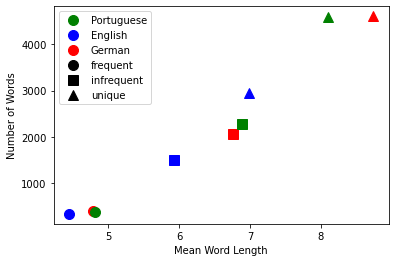

In [433]:
#####
# EXERCISE 6
"""
In this exercise, we will plot our results and look for differences 
across each translation.
Plot the word statistics of each translations on a single plot.
Note that we have already done most of the work for you.
Consider: do the word statistics differ by translation?
"""

colors = {"Portuguese": "green", "English": "blue", "German": "red"}
markers = {"frequent": "o","infrequent": "s", "unique": "^"}

import matplotlib.pyplot as plt
for i in range(grouped_data.shape[0]):
    row = grouped_data.iloc[i]
    plt.plot(row.mean_word_length, row.num_words,
        marker=markers[row.frequency],
        color = colors[row.language],
        markersize = 10
    )

color_legend = []
marker_legend = []
for color in colors:
    color_legend.append(
        plt.plot([], [],
        color=colors[color],
        marker="o",
        label = color, markersize = 10, linestyle="None")
    )
for marker in markers:
    marker_legend.append(
        plt.plot([], [],
        color="k",
        marker=markers[marker],
        label = marker, markersize = 10, linestyle="None")
    )
plt.legend(numpoints=1, loc = "upper left")

plt.xlabel("Mean Word Length")
plt.ylabel("Number of Words")

plt.show()

#####
# We see that the original English version of Hamlet contains fewer 
# words overall, and its unique words are shorter than its translations. This
# concludes the case study. You can return to the course through this link: 
#https://courses.edx.org/courses/course-v1:HarvardX+PH526x+1T2018

